<a href="https://colab.research.google.com/github/hathimazman/Master-Data-Science/blob/main/Semester_1/Data_Science/Project_2/P153146_Project_2_20242025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center;">
  <h1>
    Ahmad Hathim bin Ahmad Azman (P153146)
  </h1>
  <h2>
    Project 2<br>
    STQD6014 - Data Science<br>
    Semester 1 2024/2025
  </h2>
</div>

<a name="intro"></a>
# Introduction

> This is a copy dataset from [kaggle](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores?select=Expanded_data_with_more_features.csv). The downloaded version can be taken from my [gdrive](https://drive.google.com/file/d/1qkrpsk77nkaKU_vHSH4ZSvl-_5h2KZ47/view?usp=sharing) for reproducibility.

The purpose of this project is to analyze a dataset containing students performance in exams. This dataset also provides information regarding student's demographic data, and some behvioural data. Multiple Python libraries will be used for cleaning, and visualization such as pandas, matplotlib, and seaborn.

---

Contents:
*   [Introduction](#intro)
*   [Problem Statement](#problem-statement)
*   [Data Cleaning](#data-cleaning)
*   [Visualization](#visualization)
*   [Insights and Explanations](#InE)
*   [Conclusion](#conclusion)

## Data Description

The dataset contains multiple columns which are;

> 1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
3.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
3.  `LunchType`: School lunch type (standard or free/reduced)
4.  `TestPrep`: Test preparation course followed (completed or none)
5.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
6.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
7.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
8.  `NrSiblings`: Number of siblings the student has (0 to 7)
9.  `TransportMeans`: Means of transport to school (schoolbus/private)
10. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
11. `MathScore`: math test score(0-100)
12. `ReadingScore`: reading test score(0-100)
13. `WritingScore`: writing test score(0-100)

<a name="problem-statement"></a>
# Problem Statement

We are interested in the relationship between the students' exam scores and the socio-economic and personal backgrounds. This analysis aims to understand the distribution of the dataset and understand the working relationship between corresponding variables to the exam scores. The working analysis can be broken down into:


> 1.   [Descriptive Analytics](#descr-analytics)
    *   Understand the distribution of exam scores
    *   Demographic distribution
    *   Analyze study habits
> 2.   [Comparison Analytics](#comp-analytics)
    *   Are there any interacting features that affect score?
    *   Which score is more affected by what features?
    *   Identify key predictors of academic success



In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set_palette('rainbow')

import warnings
warnings.filterwarnings('ignore')

In [396]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [423]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science Dataset/Project/Expanded_data_with_more_features.csv', index_col=0)
data.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


<a name="data-cleaning"></a>
# Data Cleaning


## Removing duplicates

In [424]:
data.duplicated().sum()

0

There are no duplicated data in the dataset, thus no need to drop any rows.

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


The data is not correctly sorted into its respective types.

In [426]:
# Change to categorical
education_order = pd.CategoricalDtype(
    categories=["some college", "high school", "some high school", "associate's degree", "bachelor's degree", "master's degree"],
    ordered=True
)

practice_order = pd.CategoricalDtype(
    categories=["never", "sometimes", "regularly"],
    ordered=True
)

study_hours = pd.CategoricalDtype(
    categories=["< 5", "5 - 10", "> 10"],
    ordered=True
)

no_sibs = pd.CategoricalDtype(
    categories=[1,2,3,4,5,6,7],
    ordered=True
)

data['Gender'] = data['Gender'].astype('category')
data['EthnicGroup'] = data['EthnicGroup'].astype('category')
data['ParentEduc'] = data['ParentEduc'].astype(education_order)
data['LunchType'] = data['LunchType'].astype('category')
data['TestPrep'] = data['TestPrep'].astype('category')
data['ParentMaritalStatus'] = data['ParentMaritalStatus'].astype('category')
data['PracticeSport'] = data['PracticeSport'].astype(practice_order)
data['IsFirstChild'] = data['IsFirstChild'].astype('category')
data['TransportMeans'] = data['TransportMeans'].astype('category')
data['WklyStudyHours'] = data['WklyStudyHours'].astype(study_hours)
data['NrSiblings'] = data['NrSiblings'].astype(no_sibs)

In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               30641 non-null  category
 1   EthnicGroup          28801 non-null  category
 2   ParentEduc           28796 non-null  category
 3   LunchType            30641 non-null  category
 4   TestPrep             28811 non-null  category
 5   ParentMaritalStatus  29451 non-null  category
 6   PracticeSport        30010 non-null  category
 7   IsFirstChild         29737 non-null  category
 8   NrSiblings           25984 non-null  category
 9   TransportMeans       27507 non-null  category
 10  WklyStudyHours       29686 non-null  category
 11  MathScore            30641 non-null  int64   
 12  ReadingScore         30641 non-null  int64   
 13  WritingScore         30641 non-null  int64   
dtypes: category(11), int64(3)
memory usage: 1.3 MB


In [428]:
CatCols = data.select_dtypes(include=['category']).columns
NumCols = data.columns[~data.columns.isin(CatCols)]
CatCols, NumCols

(Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
        'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
        'TransportMeans', 'WklyStudyHours'],
       dtype='object'),
 Index(['MathScore', 'ReadingScore', 'WritingScore'], dtype='object'))

In [429]:
data.isnull().sum()

,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,4657
TransportMeans,3134


## Handling null values

### Visualizing the data without null values to decide on method of imputations

There are several ways to impute missing data:

**1.  Using Mean/Median**

To impute missing data using mean, we have to first visualize the dataset to look at the skewedness of data. If the data is skewed by outliers, a more robust median is preferred. However, if the data is normally distributed, mean can be used.

**2.  Using Mode**

Mode is used typically when handling categorical data.




In [430]:
data_drop_na = data.dropna()
data_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17250 entries, 2 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               17250 non-null  category
 1   EthnicGroup          17250 non-null  category
 2   ParentEduc           17250 non-null  category
 3   LunchType            17250 non-null  category
 4   TestPrep             17250 non-null  category
 5   ParentMaritalStatus  17250 non-null  category
 6   PracticeSport        17250 non-null  category
 7   IsFirstChild         17250 non-null  category
 8   NrSiblings           17250 non-null  category
 9   TransportMeans       17250 non-null  category
 10  WklyStudyHours       17250 non-null  category
 11  MathScore            17250 non-null  int64   
 12  ReadingScore         17250 non-null  int64   
 13  WritingScore         17250 non-null  int64   
dtypes: category(11), int64(3)
memory usage: 726.2 KB


In [431]:
data_drop_na.describe()

,MathScore,ReadingScore,WritingScore
count,17250.000000,17250.000000,17250.000000
mean,66.617739,69.498319,68.561391
std,15.380405,14.817095,15.511866
min,0.000000,10.000000,4.000000
25%,56.000000,59.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,78.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


<Axes: >

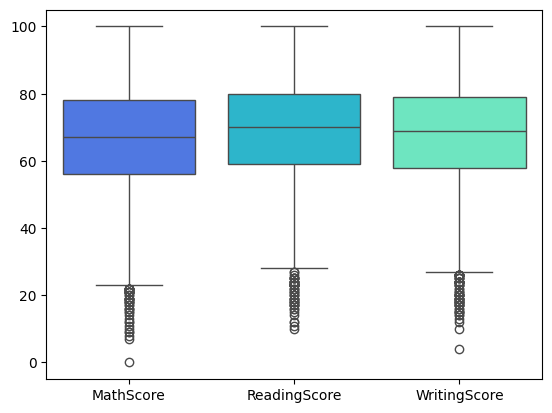

In [432]:
sns.boxplot(data_drop_na[NumCols])

In [433]:
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

# bar = CatCols[[1,2,5,8]]
# pie = CatCols[~CatCols.isin(bar)]

# axes = axes.flatten()
# for i, cols in enumerate(bar):
#   sns.countplot(data=data_drop_na,x=cols, ax=axes[i], hue=cols)
#   axes[i].set_title(cols)
#   axes[i].set_xlabel('')
#   axes[i].set_ylabel('')
#   axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# for i, cols in enumerate(pie):
#   axes[i+4].pie(x=data_drop_na[cols].value_counts(), autopct='%1.1f%%', labels=data_drop_na[cols].unique())
#   axes[i+4].set_title(cols)

# for j in range(len(CatCols), len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()
# plt.clf()

Since the data is not normally distributed median is preferred to replace missing data

### Replacing null values with median for numerical data, and mode for categorical data

In [434]:
data_clean = data.copy()
data_clean[NumCols] = data[NumCols].fillna(data[NumCols].median())
data_clean[CatCols] = data[CatCols].fillna(data[CatCols].mode().iloc[0])
data_clean.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0
TransportMeans,0


In [435]:
data_clean.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,30641,2,female,15424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EthnicGroup,30641,5,group C,11052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ParentEduc,30641,6,some college,8478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LunchType,30641,2,standard,19905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TestPrep,30641,2,none,20686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ParentMaritalStatus,30641,4,married,18034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PracticeSport,30641,3,sometimes,15844,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IsFirstChild,30641,2,yes,19986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NrSiblings,30641.0,7.0,1.0,12874.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransportMeans,30641,2,school_bus,19279,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Handling Outliers

There are multiple ways to handle outliers. One of the methods is using the IQR. To decide on whether a data is an outlier, we can observe the equation:

$$Upper~Fence = Q_3+1.5(IQR)$$
$$Lower~Fence = Q_1-1.5(IQR)$$

Any values which are above the upper fence and below the lower fence, can be classified as outliers. Thus, can be removed from the data for better quality results.

In [436]:
for col in NumCols:
  Q1 = data_clean[col].quantile(0.25)
  Q3 = data_clean[col].quantile(0.75)
  IQR = Q3 - Q1
  upper_fence = Q3 + 1.5 * IQR
  lower_fence = Q1 - 1.5 * IQR
  data_clean = data_clean[(data_clean[col] > lower_fence) & (data_clean[col] < upper_fence)]

In [437]:
data_clean.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,female,group C,some college,standard,none,married,sometimes,yes,1,school_bus,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,1,school_bus,5 - 10,76,78,75


In [438]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30462 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               30462 non-null  category
 1   EthnicGroup          30462 non-null  category
 2   ParentEduc           30462 non-null  category
 3   LunchType            30462 non-null  category
 4   TestPrep             30462 non-null  category
 5   ParentMaritalStatus  30462 non-null  category
 6   PracticeSport        30462 non-null  category
 7   IsFirstChild         30462 non-null  category
 8   NrSiblings           30462 non-null  category
 9   TransportMeans       30462 non-null  category
 10  WklyStudyHours       30462 non-null  category
 11  MathScore            30462 non-null  int64   
 12  ReadingScore         30462 non-null  int64   
 13  WritingScore         30462 non-null  int64   
dtypes: category(11), int64(3)
memory usage: 1.3 MB


In [439]:
# fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))

# bar = CatCols[[1,2,5,8]]
# pie = CatCols[~CatCols.isin(bar)]

# axes = axes.flatten()
# for i, cols in enumerate(bar):
#   sns.countplot(data=data_clean,x=cols, ax=axes[i], hue=cols)
#   axes[i].set_title(cols)
#   axes[i].set_xlabel('')
#   axes[i].set_ylabel('')
#   axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# for i, cols in enumerate(pie):
#   axes[i+4].pie(x=data_clean[cols].value_counts(), autopct='%1.1f%%', labels=data_clean[cols].unique())
#   axes[i+4].set_title(cols)

# for j in range(len(CatCols), len(axes)):
#     fig.delaxes(axes[j])

# plt.tight_layout()
# plt.show()
# plt.clf()

<a name="visualization"></a>
# Visualization


## Visualizing the completely cleaned dataset

Outlier have been removed, and missing data has been imputed. Thus lets visualise the complete data.

<Axes: >

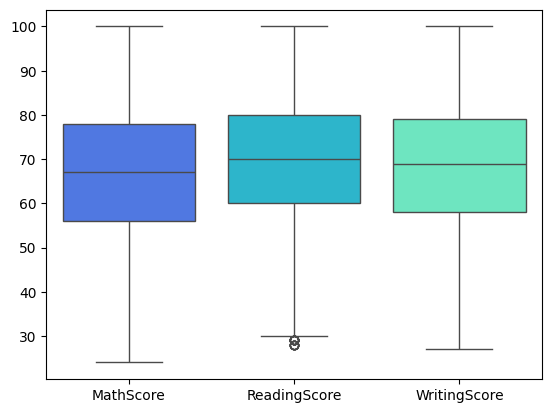

In [440]:
sns.boxplot(data_clean[NumCols])

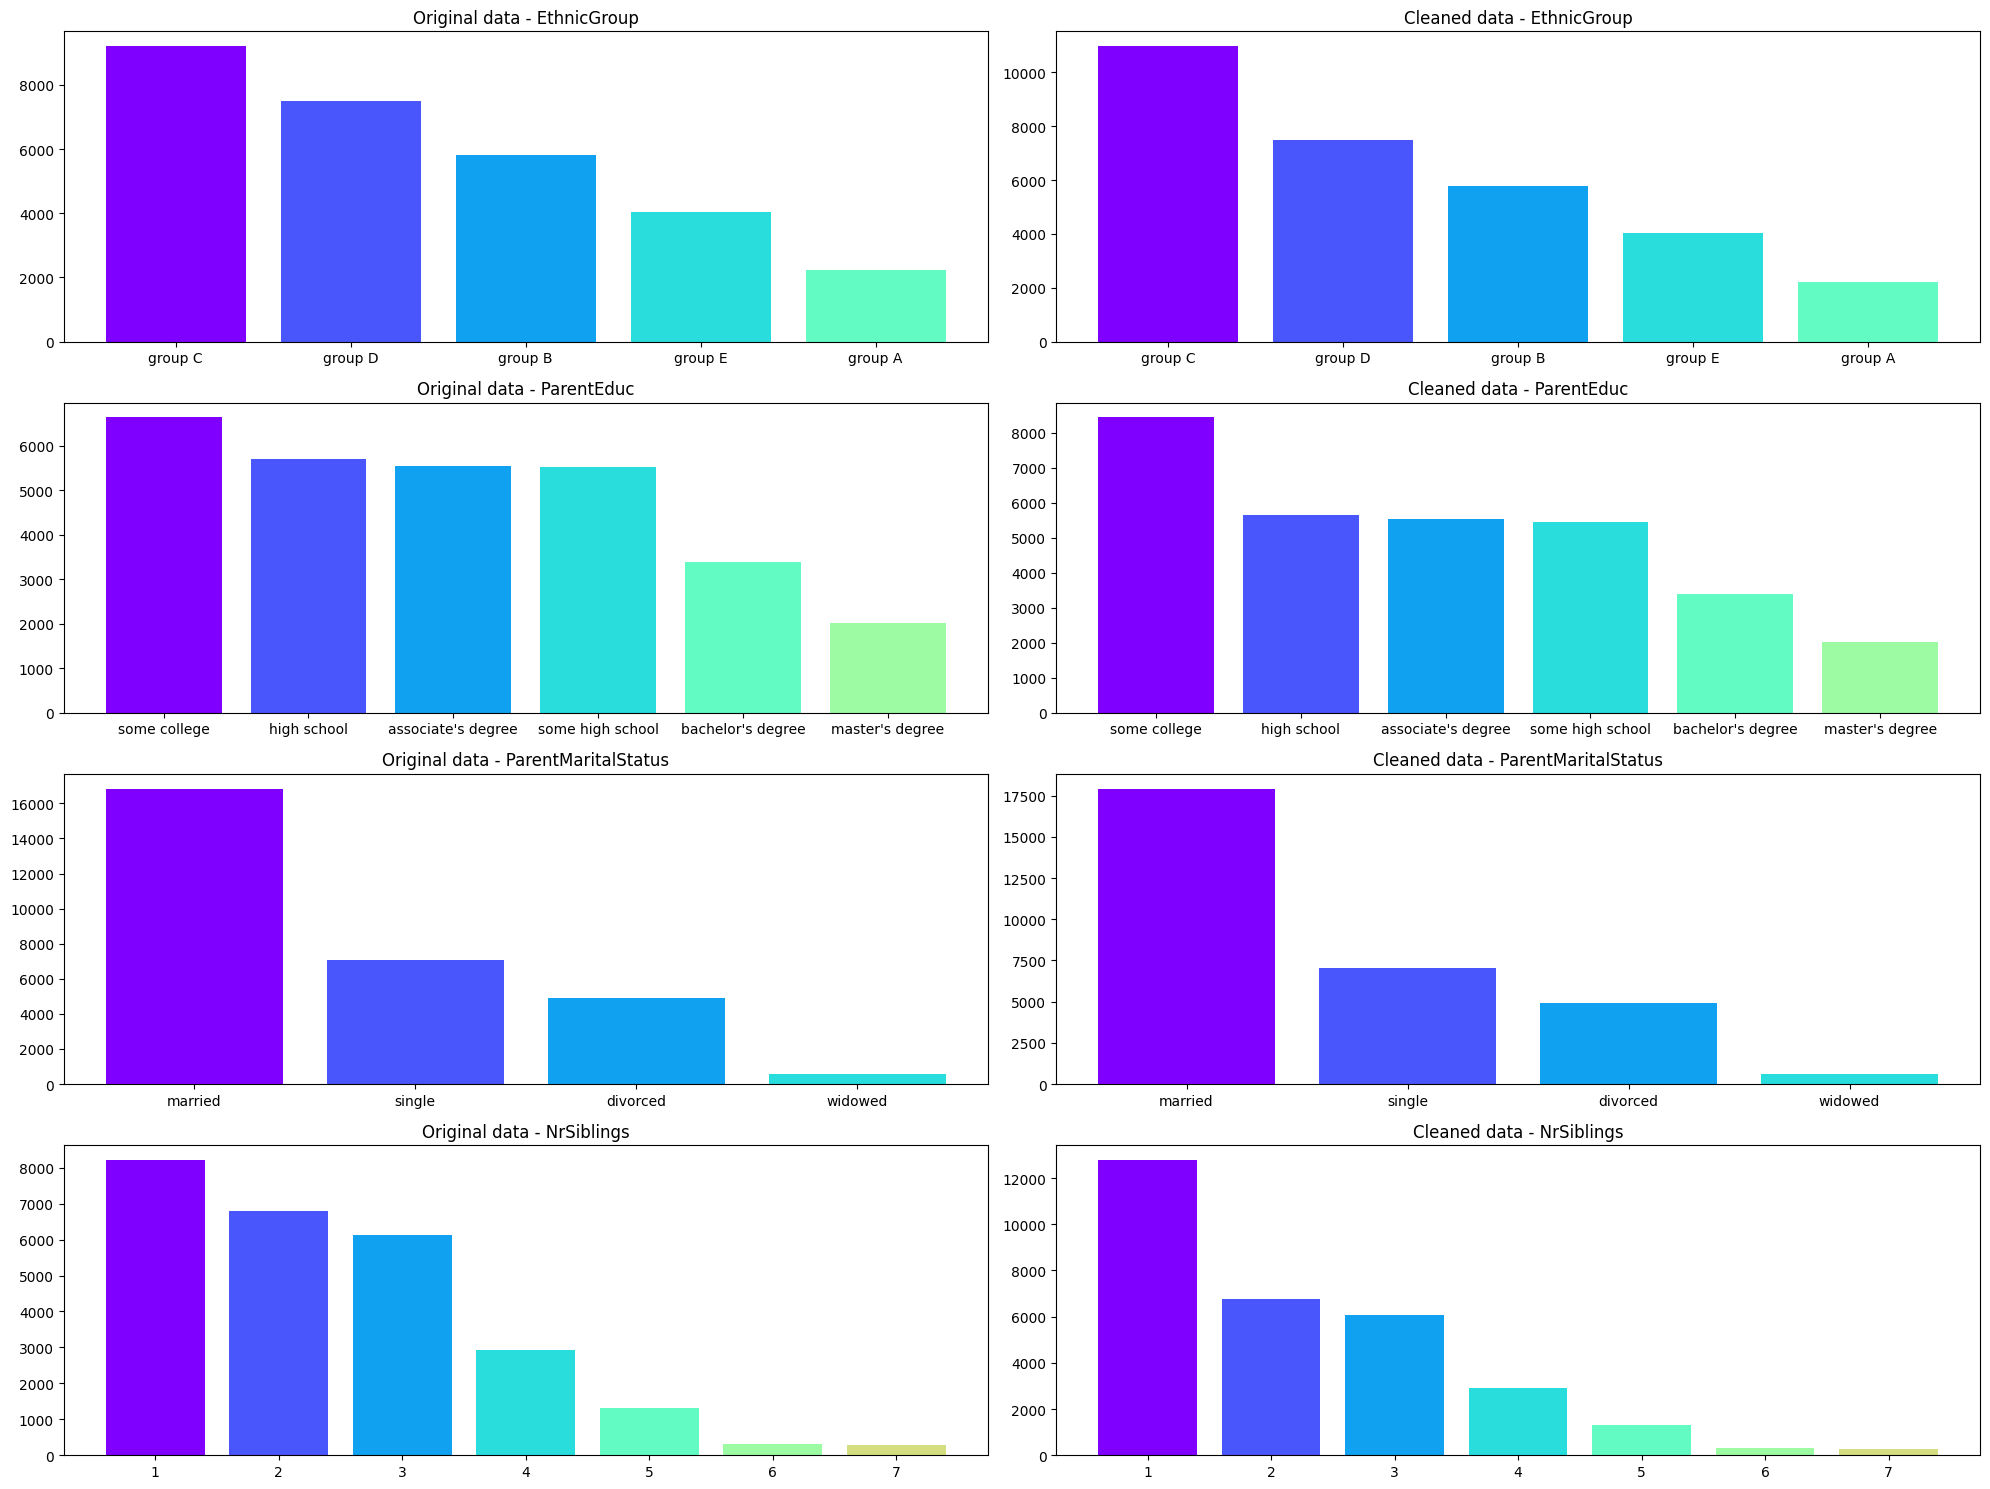

In [441]:
bars = CatCols[[1,2,5,8]]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(bars), ncols=2, figsize=(20, 15))

# Define the rainbow color palette
colors = plt.cm.rainbow(np.linspace(0, 1, 10))

for i, column in enumerate(bars):
    # Plot data
    data_counts = data[column].value_counts()
    axes[i][0].bar(data_counts.index, data_counts.values, color=colors[:len(data_counts)])
    axes[i][0].set_title(f'Original data - {column}')
    axes[i][0].set_xlabel('')
    axes[i][0].set_ylabel('')

    # Plot data_clean
    data_clean_counts = data_clean[column].value_counts()
    axes[i][1].bar(data_clean_counts.index, data_clean_counts.values, color=colors[:len(data_clean_counts)])
    axes[i][1].set_title(f'Cleaned data - {column}')
    axes[i][1].set_xlabel('')
    axes[i][1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

This is the comparison pie plot between original data and cleaned data:



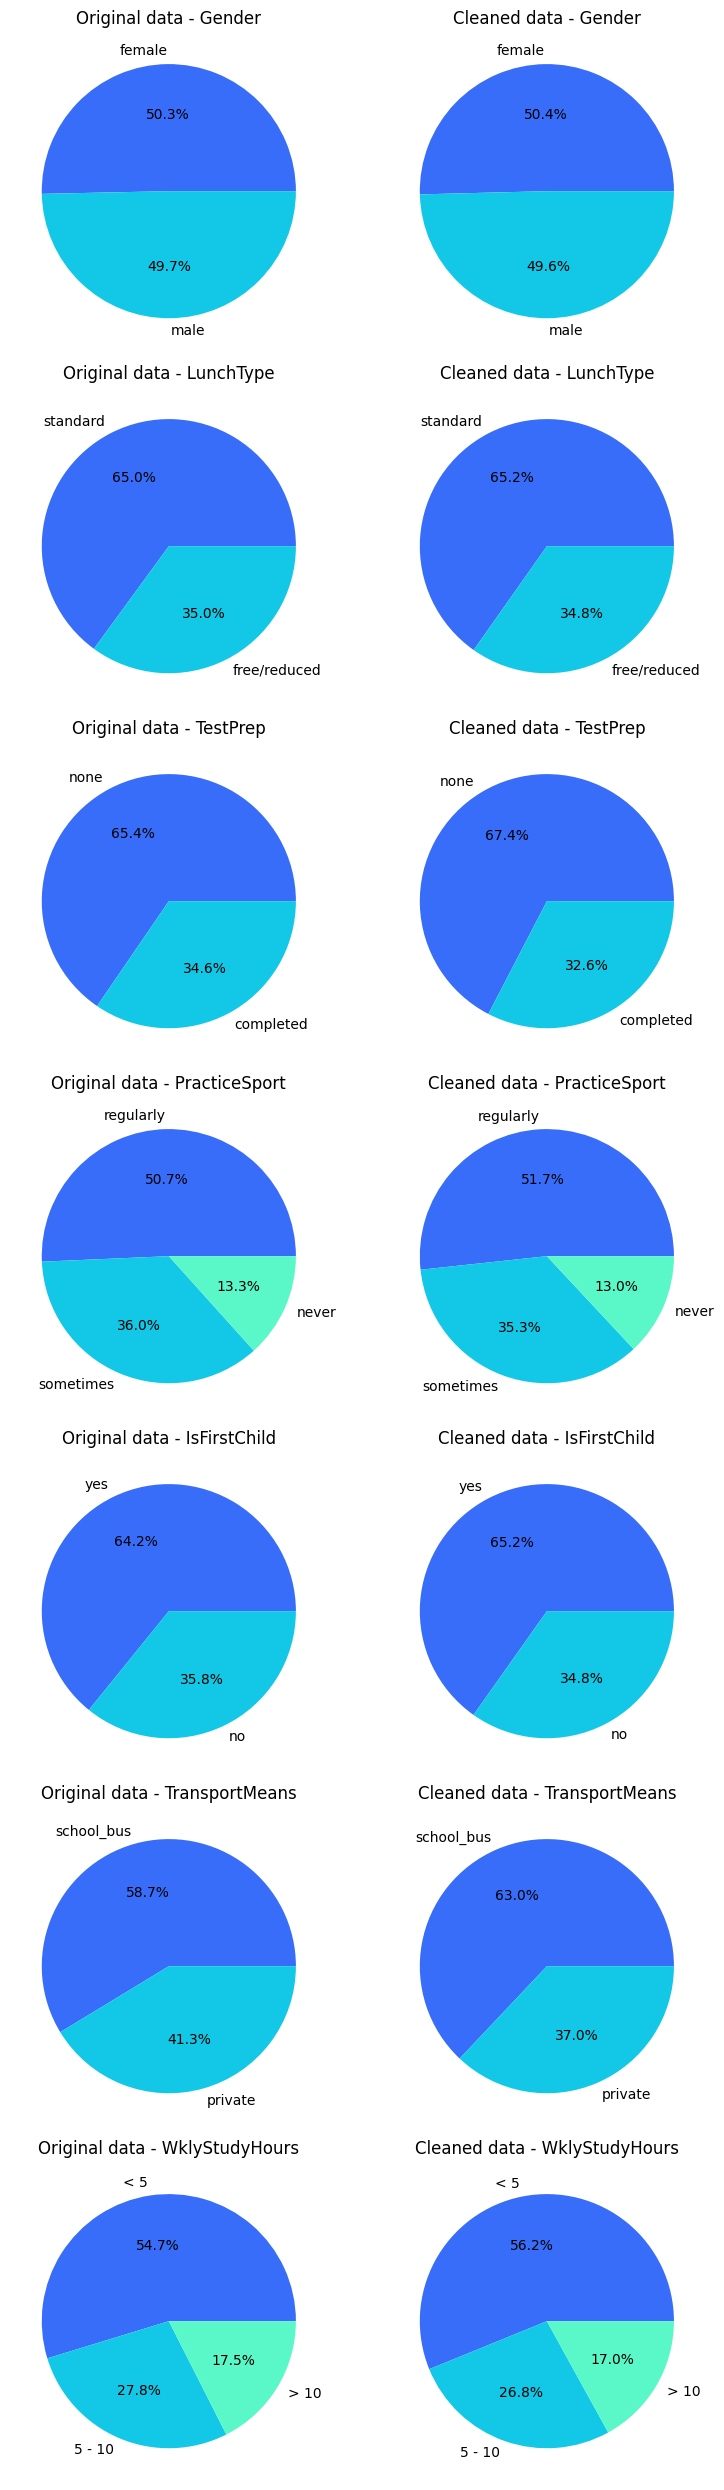

In [442]:
print(f"This is the comparison pie plot between original data and cleaned data:\n")
pies = CatCols[~CatCols.isin(bars)]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(pies), ncols=2, figsize=(8, 25))

# Define the rainbow color palette
colors = plt.cm.rainbow(np.linspace(0, 1, 10))

# for i, cols in enumerate(pie):
#   axes[i+4].pie(x=data_clean[cols].value_counts(), autopct='%1.1f%%', labels=data_clean[cols].unique())
#   axes[i+4].set_title(cols)

for i, column in enumerate(pies):
  # Plot data
  data_counts = data[column].value_counts()
  axes[i][0].pie(x=data[column].value_counts(), autopct='%1.1f%%', labels=data[column].dropna().unique())
  axes[i][0].set_title(f'Original data - {column}')
  axes[i][0].set_xlabel('')
  axes[i][0].set_ylabel('')

  # Plot data_clean
  data_clean_counts = data_clean[column].value_counts()
  axes[i][1].pie(x=data_clean[column].value_counts(), autopct='%1.1f%%', labels=data_clean[column].unique())
  axes[i][1].set_title(f'Cleaned data - {column}')
  axes[i][1].set_xlabel('')
  axes[i][1].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

Thus from the comparison of between the original data and the cleaned data. We have successfully imputed the missing values and removed the outliers while preserving the identity of the data. The distribution is roughly still the same, but with more reliable dataset for better exploratory and insights.

<a name="InE"></a>
# Insights and Explanations

We will narrow down on chosen data from the cleaned dataset and obtain valuable insights

<a name="descr-analytics"></a>
## Descriptive Analytics

### Understand the distribution of exam scores


In [443]:
data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
MathScore,30462.0,66.806480,15.046939,24.0,56.0,67.0,78.0,100.0
ReadingScore,30462.0,69.619920,14.445517,28.0,60.0,70.0,80.0,100.0
WritingScore,30462.0,68.671361,15.120827,27.0,58.0,69.0,79.0,100.0


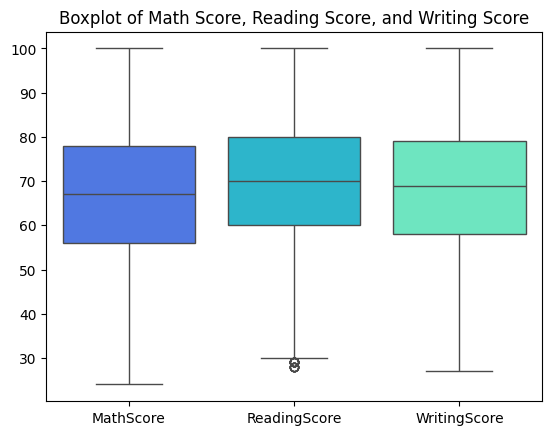

In [444]:
sns.boxplot(data_clean[NumCols])
plt.title("Boxplot of Math Score, Reading Score, and Writing Score")
plt.show()

As can be observed above, the distribution of the test scores can be visualized with fairly normal distribution.



### Demographic distribution

1.  `Gender`: Gender of the student (male/female)
2.  `EthnicGroup`: Ethnic group of the student (group A to E)
5.  `ParentMaritalStatus`: Parent(s) marital status (married/single/widowed/divorced)
7.  `IsFirstChild`: If the child is first child in the family or not (yes/no)
8.  `NrSiblings`: Number of siblings the student has (0 to 7)









In [445]:
demographic = CatCols[[0,1,5,7,8]]
demographic

Index(['Gender', 'EthnicGroup', 'ParentMaritalStatus', 'IsFirstChild',
       'NrSiblings'],
      dtype='object')

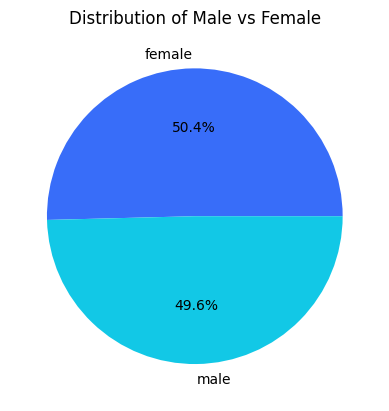

In [446]:
plt.pie(x=data_clean['Gender'].value_counts(), autopct='%1.1f%%', labels=data_clean['Gender'].unique())
plt.title('Distribution of Male vs Female')
plt.show()

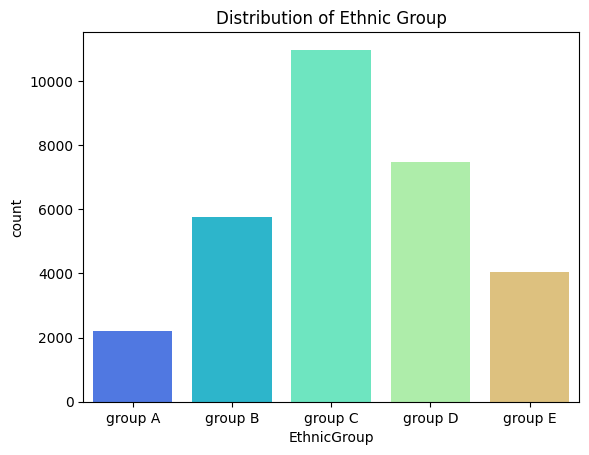

In [447]:
sns.countplot(data=data_clean,x='EthnicGroup', hue='EthnicGroup')
plt.title("Distribution of Ethnic Group")
plt.show()

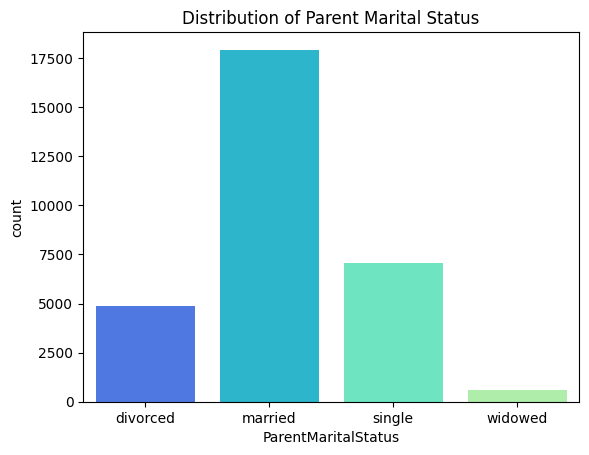

In [448]:
sns.countplot(data=data_clean,x='ParentMaritalStatus', hue='ParentMaritalStatus')
plt.title("Distribution of Parent Marital Status")
plt.show()

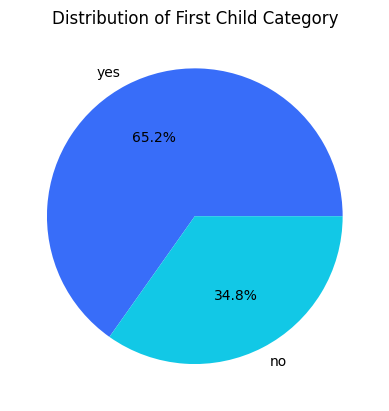

In [449]:
plt.pie(x=data_clean['IsFirstChild'].value_counts(), autopct='%1.1f%%', labels=data_clean['IsFirstChild'].unique())
plt.title('Distribution of First Child Category')
plt.show()

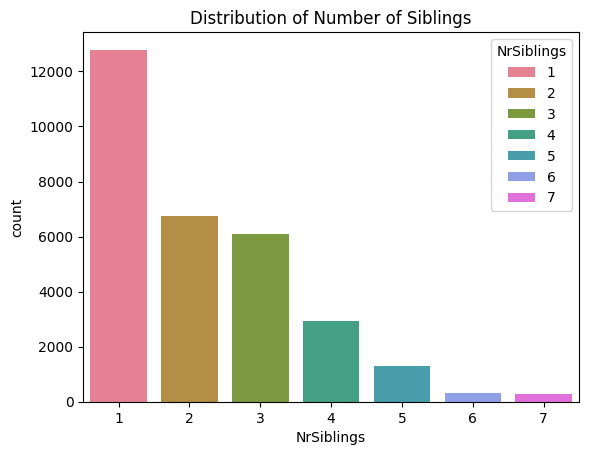

In [450]:
sns.countplot(data=data_clean,x='NrSiblings', hue='NrSiblings')
plt.title("Distribution of Number of Siblings")
plt.show()

### Socioeconomic distribution

1.  `ParentEduc`: Parent(s) education background (from some_highschool to master's degree)
2.  `LunchType`: School lunch type (standard or free/reduced)
3.  `TransportMeans`: Means of transport to school (schoolbus/private)

In [451]:
socio = CatCols[[2,3,9]]
socio

Index(['ParentEduc', 'LunchType', 'TransportMeans'], dtype='object')

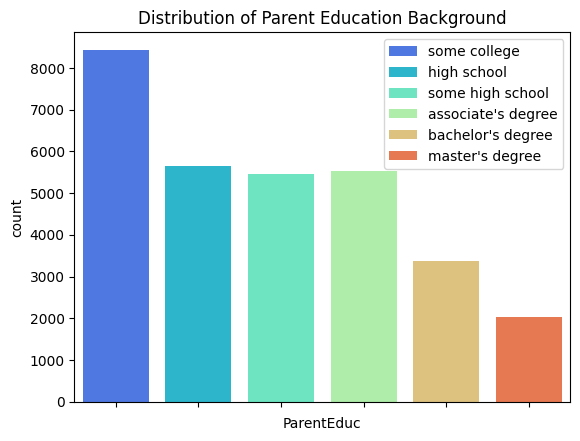

In [452]:
ax = sns.countplot(data=data_clean,x='ParentEduc', hue='ParentEduc', legend=True)
ax.legend(loc='upper right')
ax.set_xticklabels('')
plt.title('Distribution of Parent Education Background')
plt.show()

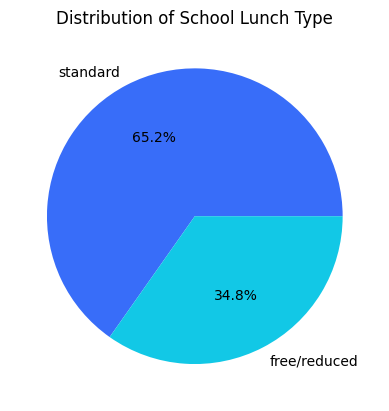

In [453]:
plt.pie(x=data_clean['LunchType'].value_counts(), autopct='%1.1f%%', labels=data_clean['LunchType'].unique())
plt.title('Distribution of School Lunch Type')
plt.show()

### Analyze  habits

1.  `TestPrep`: Test preparation course followed (completed or none)
2.  `PracticeSport`: How often the student parctice sport (never/sometimes/regularly))
3. `WklyStudyHours`: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)*italicized text*

In [454]:
habits = CatCols[[4,6,10]]
habits

Index(['TestPrep', 'PracticeSport', 'WklyStudyHours'], dtype='object')

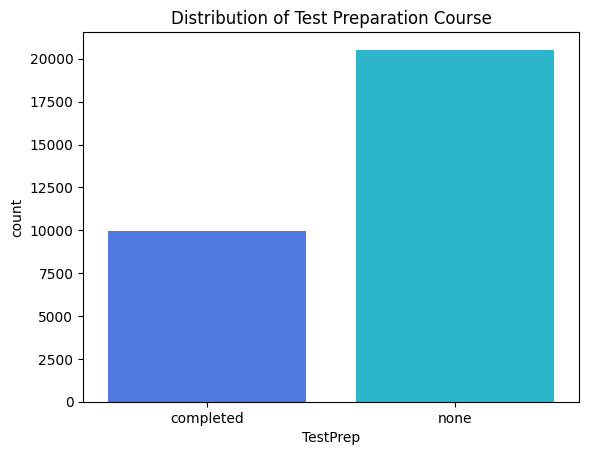

In [455]:
sns.countplot(data=data_clean,x='TestPrep', hue='TestPrep')
plt.title("Distribution of Test Preparation Course")
plt.show()

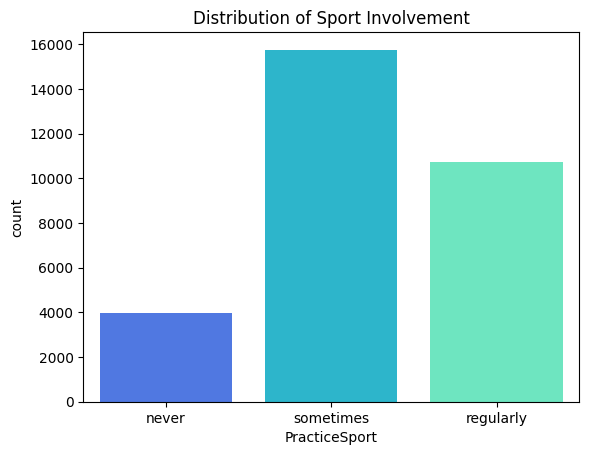

In [456]:
sns.countplot(data=data_clean,x='PracticeSport', hue='PracticeSport')
plt.title("Distribution of Sport Involvement")
plt.show()

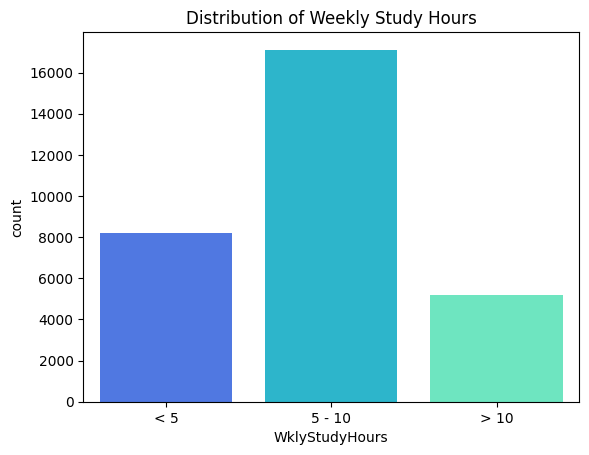

In [457]:
sns.countplot(data=data_clean,x='WklyStudyHours', hue='WklyStudyHours')
plt.title("Distribution of Weekly Study Hours")
plt.show()

<a name="comp-analytics"></a>
## Comparison Analytics

### Are there any interacting features that affect score?

#### Math Score

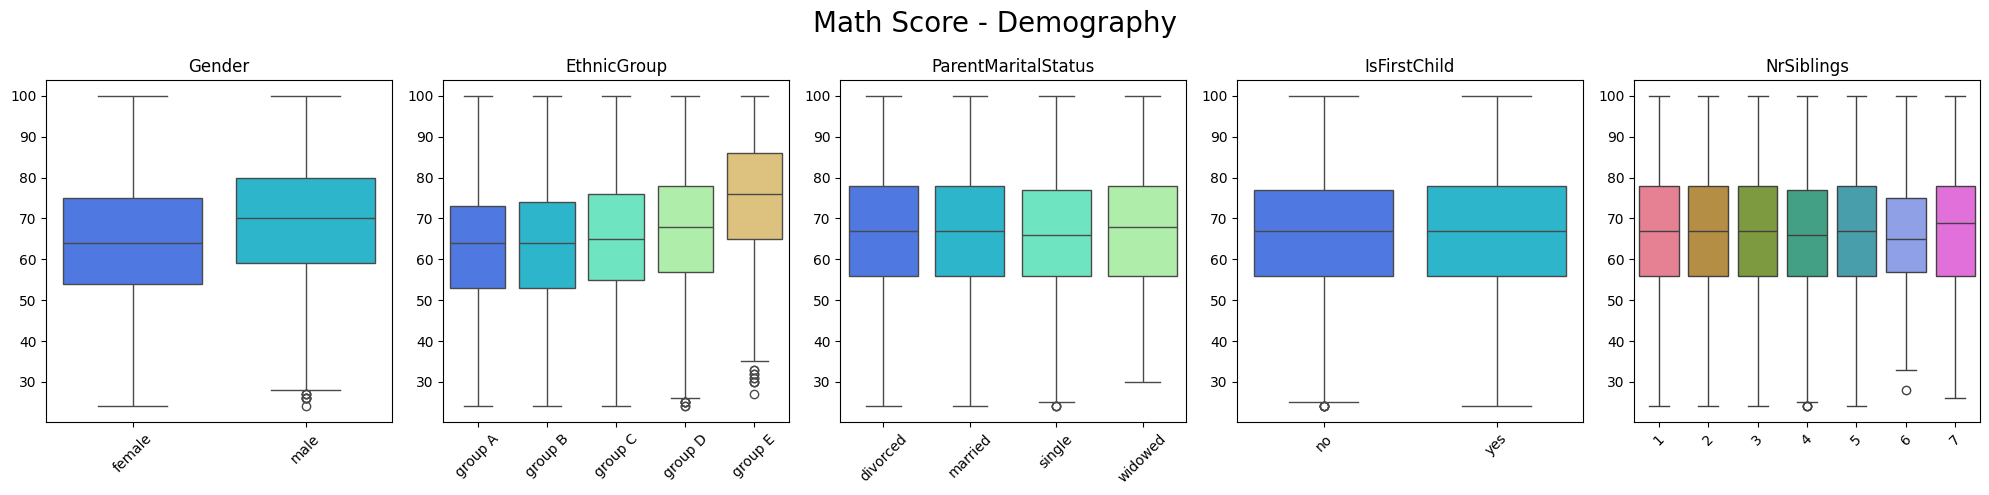

<Figure size 640x480 with 0 Axes>

In [458]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

fig.suptitle('Math Score - Demography', fontsize=20)

axes = axes.flatten()
for i, cols in enumerate(demographic):
  sns.boxplot(data=data_clean,x=cols, y='MathScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

Males show a higher math score compared to females

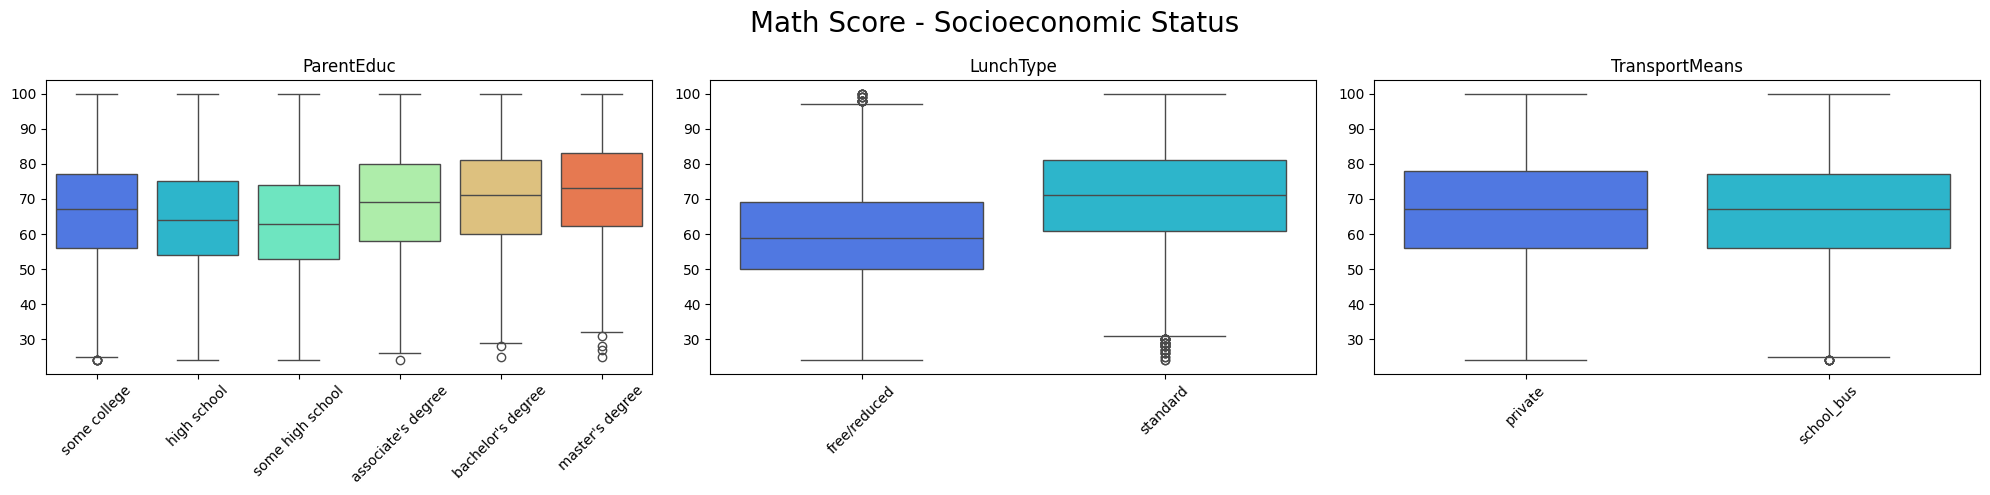

<Figure size 640x480 with 0 Axes>

In [460]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

fig.suptitle('Math Score - Socioeconomic Status', fontsize=20)

axes = axes.flatten()
for i, cols in enumerate(socio):
  sns.boxplot(data=data_clean,x=cols, y='MathScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

From the plots above, it can be seen that socioeconomic status such as Parents Education Level and Lunch Types of the students may affect the math score. Those, more well off may reflect higher maths score.

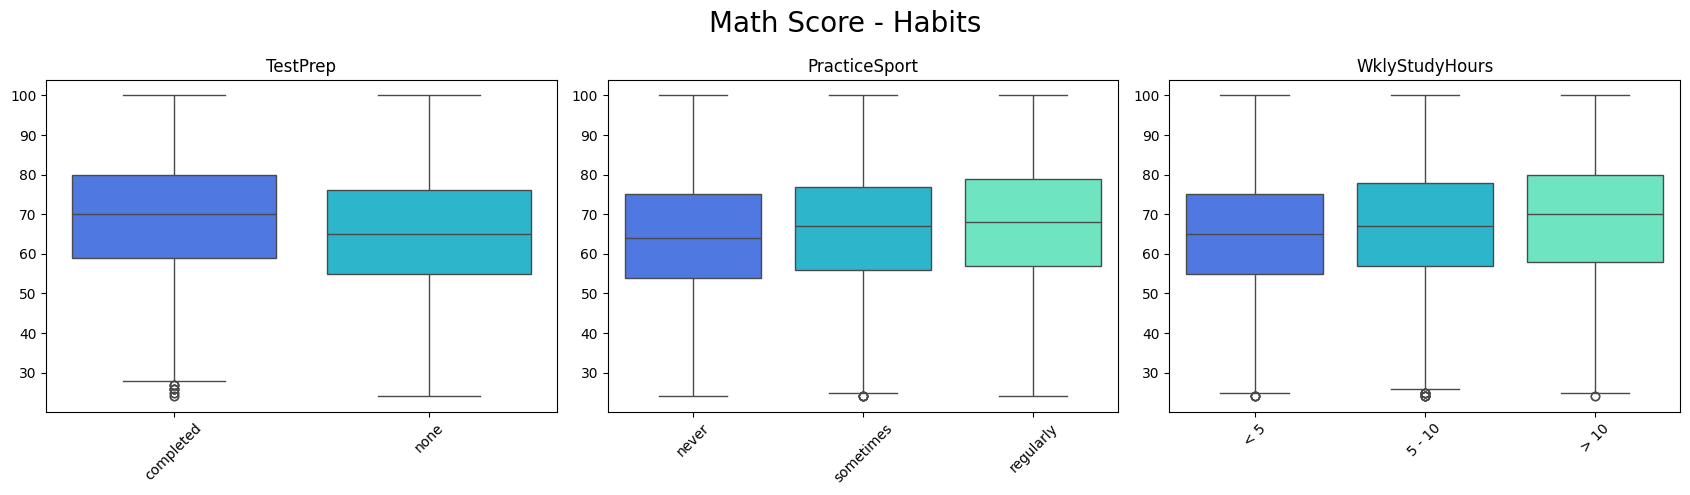

<Figure size 640x480 with 0 Axes>

In [461]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

fig.suptitle('Math Score - Habits', fontsize=20)

axes = axes.flatten()
for i, cols in enumerate(habits):
  sns.boxplot(data=data_clean,x=cols, y='MathScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

Habits also show slight variation in maths score but none that stand out too much.

#### Reading Score

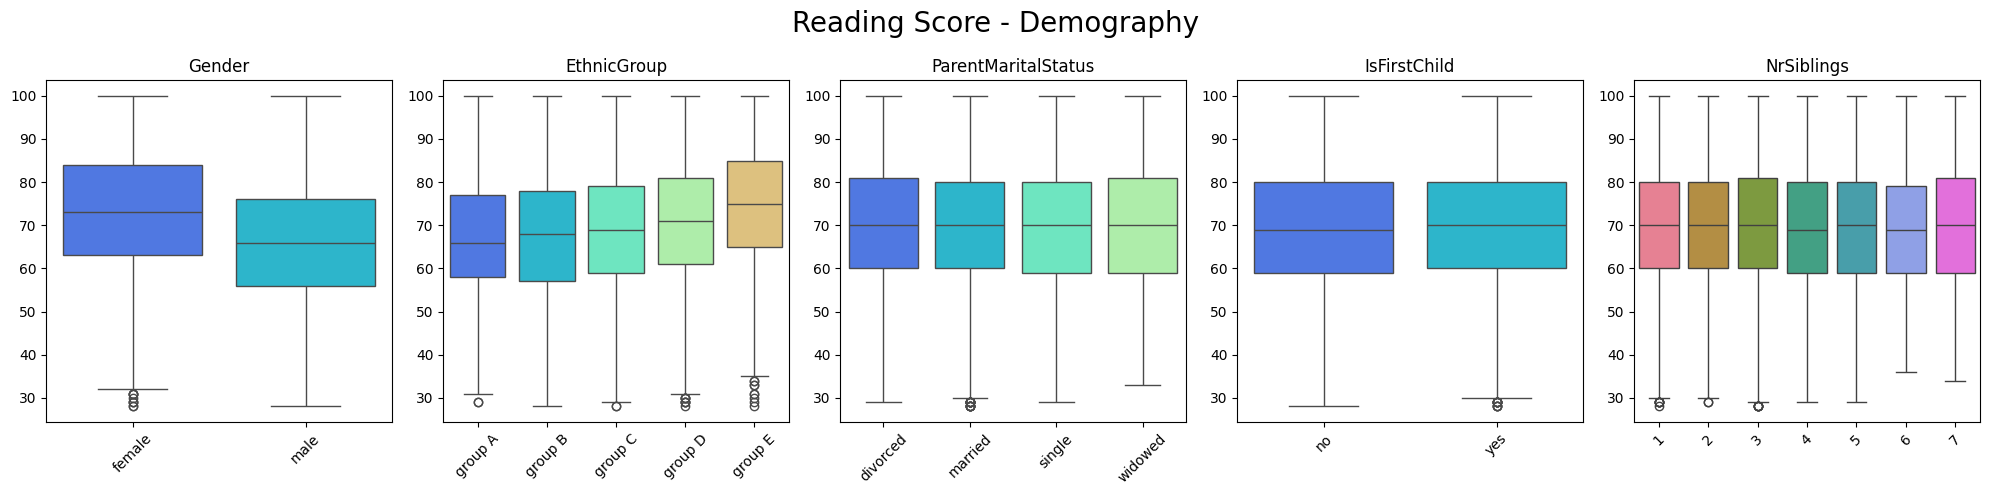

<Figure size 640x480 with 0 Axes>

In [462]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

fig.suptitle('Reading Score - Demography', fontsize=20)

axes = axes.flatten()
for i, cols in enumerate(demographic):
  sns.boxplot(data=data_clean,x=cols, y='ReadingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

In the reading score, females and ethnic group E shows a higher score.

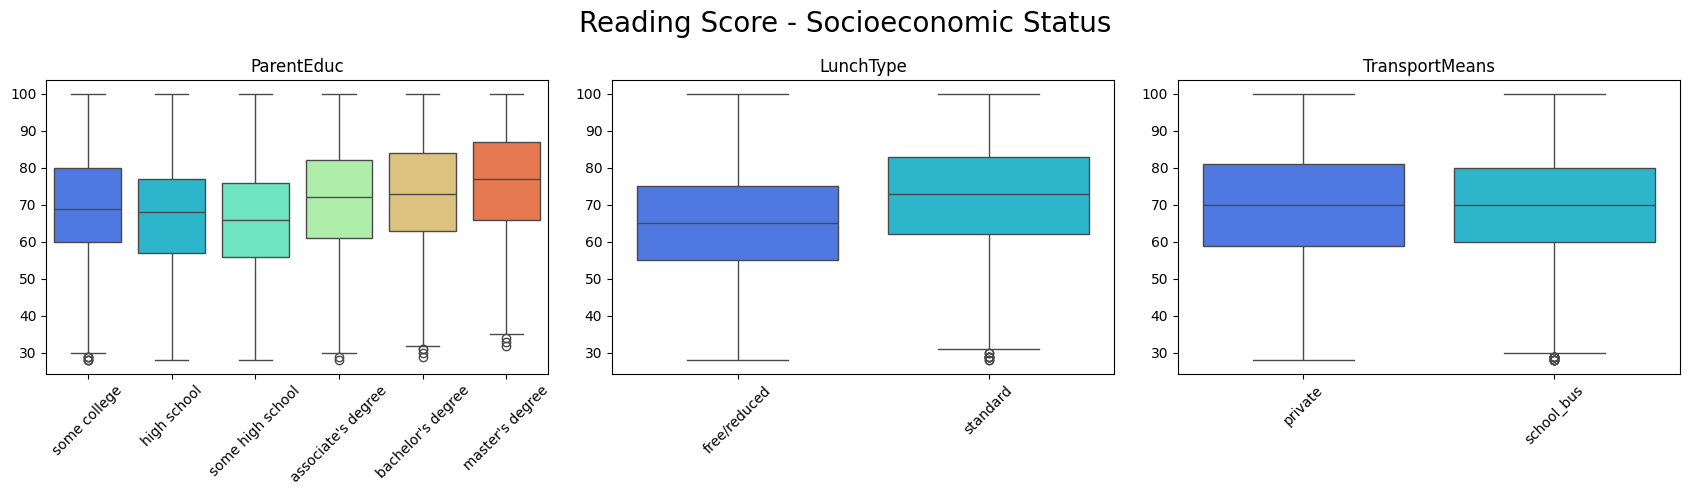

<Figure size 640x480 with 0 Axes>

In [463]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

fig.suptitle('Reading Score - Socioeconomic Status', fontsize=20)

axes = axes.flatten()
for i, cols in enumerate(socio):
  sns.boxplot(data=data_clean,x=cols, y='ReadingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

Socioeconomic status also may play a role in readcing score as highlighted that students with parents that have a higher education background tend to have higher reading score. Lunch type also may reflect on socioeconomic status which shows higher reading score in more privileged students.

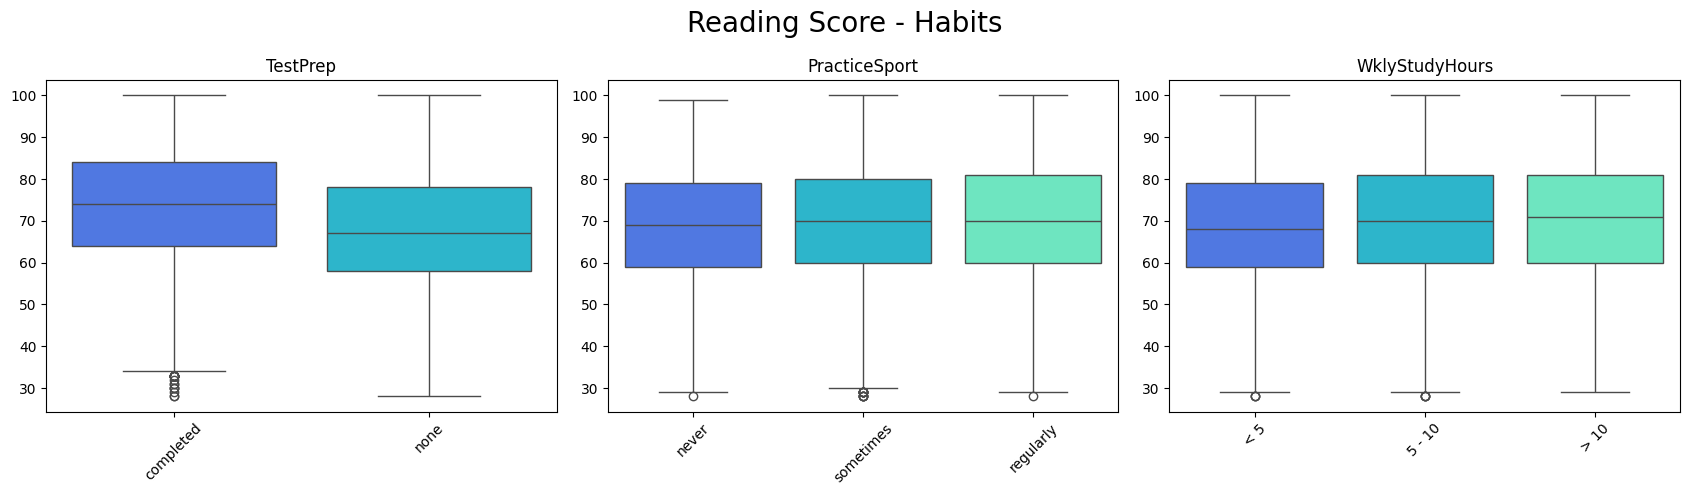

<Figure size 640x480 with 0 Axes>

In [464]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

fig.suptitle('Reading Score - Habits', fontsize=20)

axes = axes.flatten()
for i, cols in enumerate(habits):
  sns.boxplot(data=data_clean,x=cols, y='ReadingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

Habits also does not show much variation in score except for completion of test preparation programme which shows higher reading score in those who complete the test preparation programme.

#### Writing Score

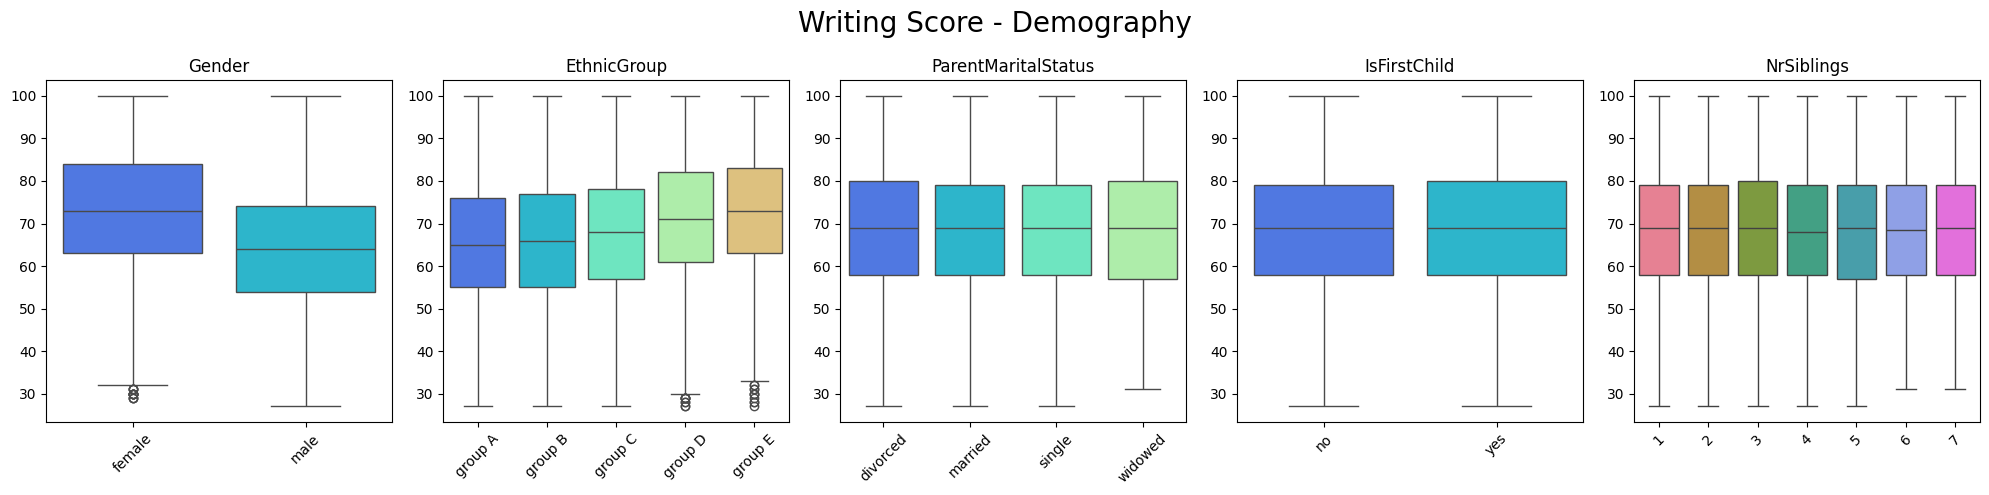

<Figure size 640x480 with 0 Axes>

In [465]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

fig.suptitle('Writing Score - Demography', fontsize=20)

axes = axes.flatten()
for i, cols in enumerate(demographic):
  sns.boxplot(data=data_clean,x=cols, y='WritingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

From the graphs above, it can be seen like the reading score, females and group E ethnics tend to score higher than males

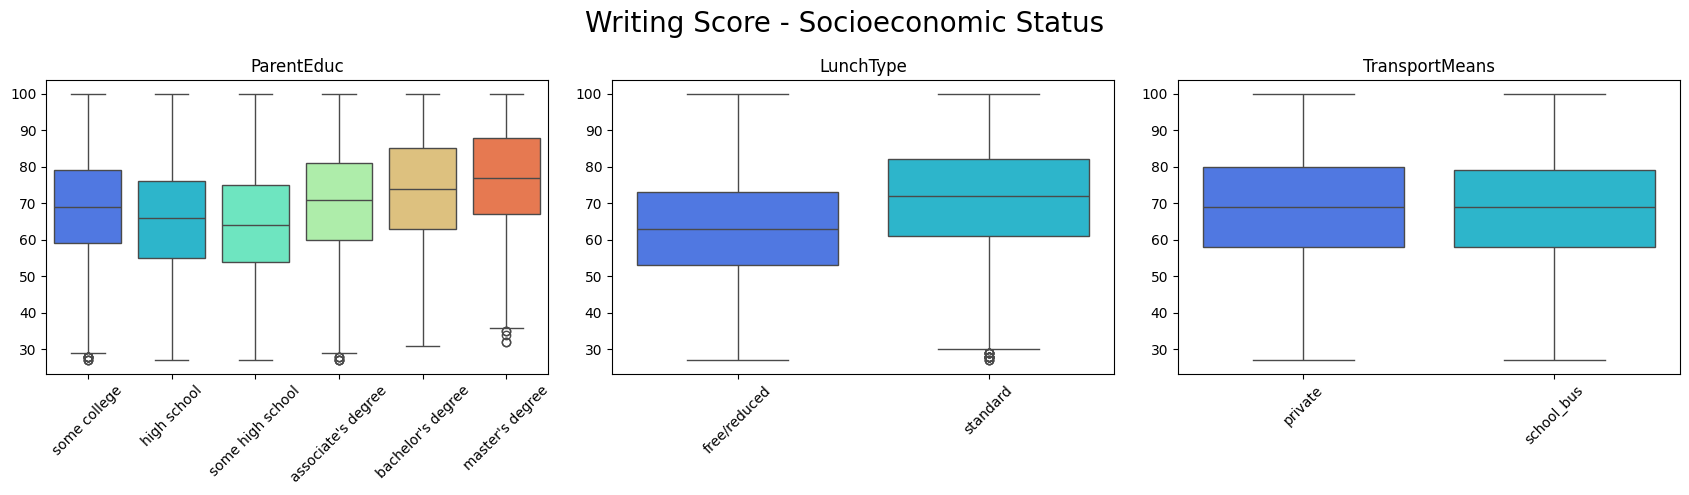

<Figure size 640x480 with 0 Axes>

In [466]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

fig.suptitle('Writing Score - Socioeconomic Status', fontsize=20)

axes = axes.flatten()
for i, cols in enumerate(socio):
  sns.boxplot(data=data_clean,x=cols, y='WritingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

Students with parents that are more educated tend to perform better in writing exams

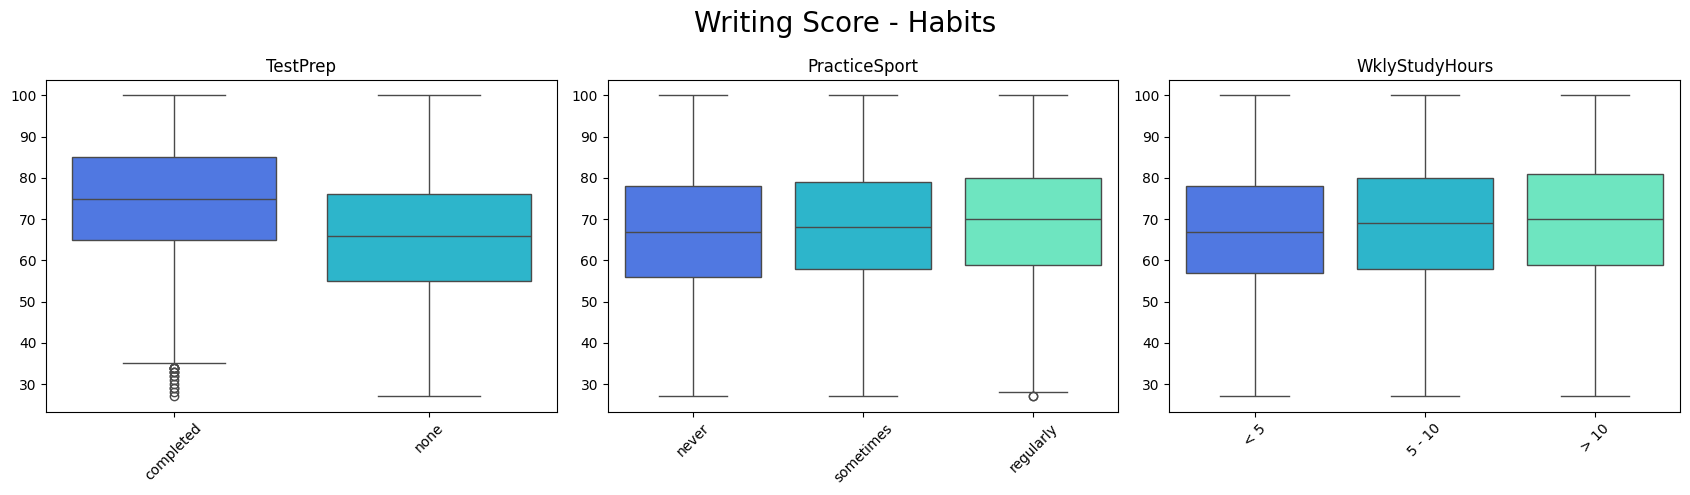

<Figure size 640x480 with 0 Axes>

In [467]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))

fig.suptitle('Writing Score - Habits', fontsize=20)

axes = axes.flatten()
for i, cols in enumerate(habits):
  sns.boxplot(data=data_clean,x=cols, y='WritingScore', ax=axes[i], hue=cols, legend=False)
  axes[i].set_title(cols)
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()
plt.clf()

Test preparation also shows positive effect on the writing score

### Which score is more affected by what features?

Looking at the multiple plots above it can be concluded that;

1. For math score, it is mainly affected by

### Relationship between Exam Scores

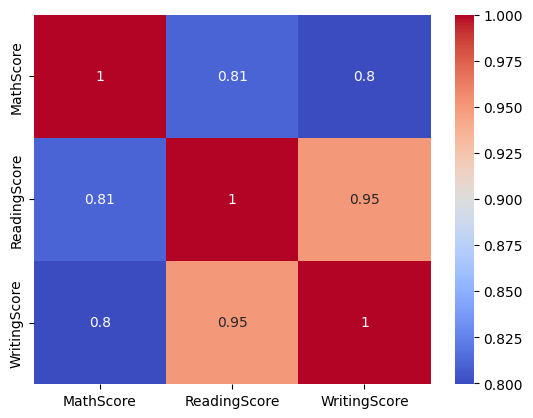

In [469]:
sns.heatmap(data_clean[NumCols].corr(), annot=True, cmap='coolwarm')
plt.show()

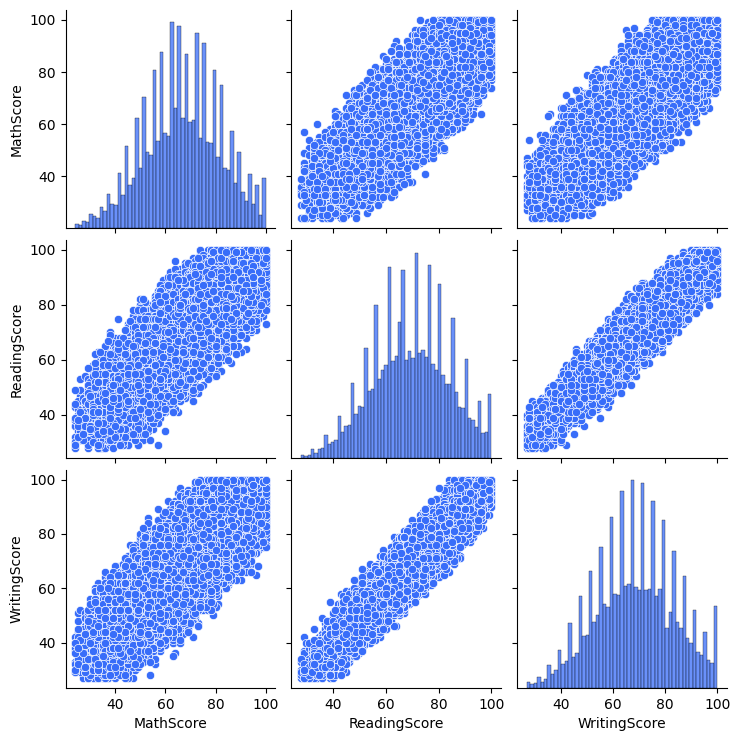

In [470]:
sns.pairplot(data_clean[NumCols])
plt.show()

From the correlation matrix and the scatterplot, it can be seen that the exam scores are highly correlated with each other. Particularly between the reading score and writing score. Students who perform well on one exam will tend to perform well on the other exams as well.

### Identify key predictors of academic success

From the plots above, it can be seen that certain features may become key predictors for academic success. It can be categorised according to exams.

1. Gender
2. Lunch Type
3. Test Preparation
4. Other exams

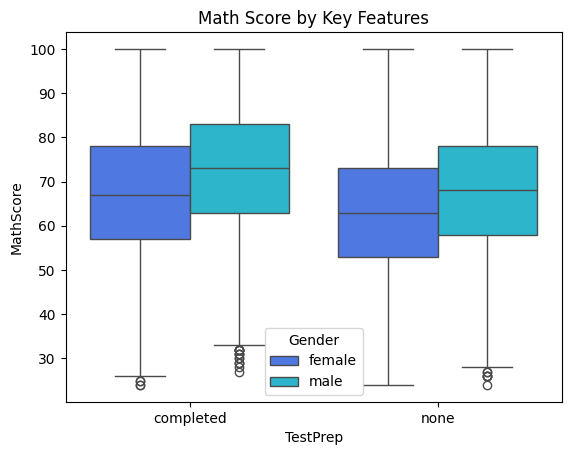

In [471]:
sns.boxplot(data=data_clean, x='TestPrep', y='MathScore', hue='Gender')
plt.title('Math Score by Key Features')
plt.show()

Even among those who completed the test preparation course, males tend to perform better than females. It can be also seen that males who did not complete the preparation course perform similarly to females who join the preparation course.

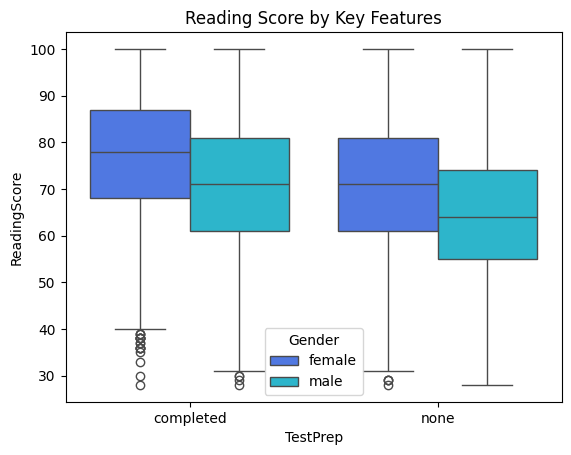

In [472]:
sns.boxplot(data=data_clean, x='TestPrep', y='ReadingScore', hue='Gender')
plt.title('Reading Score by Key Features')
plt.show()

However, on the other hand, the opposite can be seen in the Reading Score.

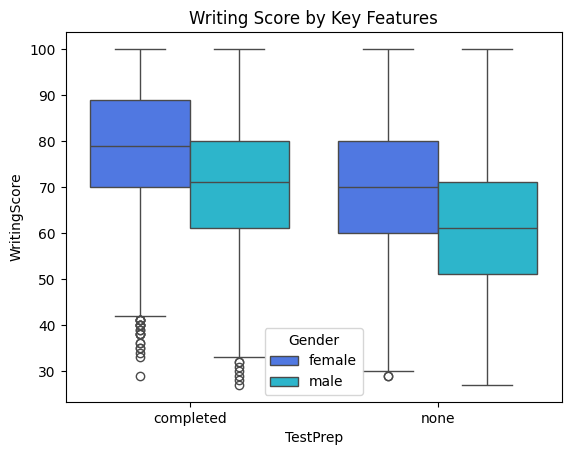

In [474]:
sns.boxplot(data=data_clean, x='TestPrep', y='WritingScore', hue='Gender')
plt.title('Writing Score by Key Features')
plt.show()

A similar pattern can be seen for the Writing Score

<a name="conclusion"></a>
# Conclusion